In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [17]:
df = pd.read_csv("../data/FuelConsumption.csv")
cdf = df[["CYLINDERS","ENGINESIZE","FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]

In [18]:
cdf.head(9)

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,4,2.0,8.5,196
1,4,2.4,9.6,221
2,4,1.5,5.9,136
3,6,3.5,11.1,255
4,6,3.5,10.6,244
5,6,3.5,10.0,230
6,6,3.5,10.1,232
7,6,3.7,11.1,255
8,6,3.7,11.6,267


In [19]:
plt.rcParams['figure.figsize'] = (12,6)

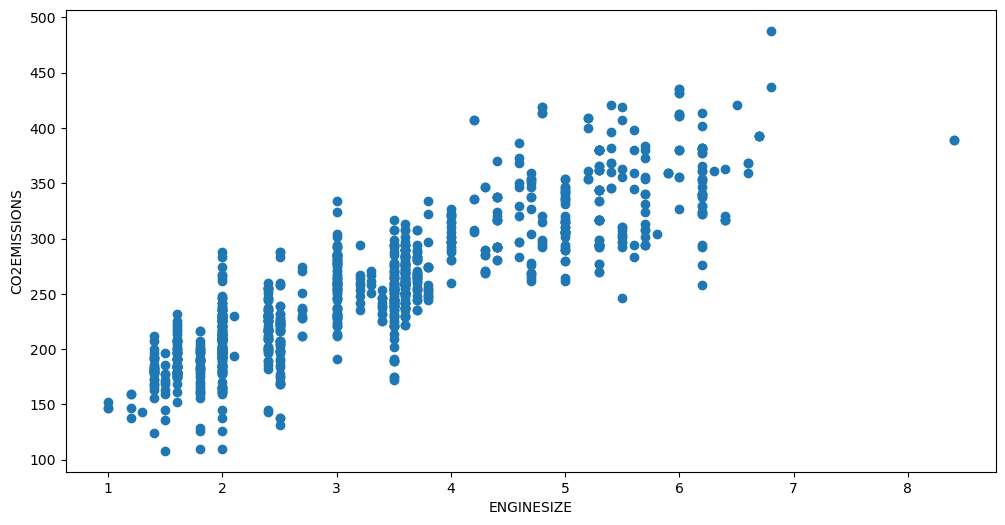

In [20]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [21]:
train,test= train_test_split(df, test_size=0.2)

- in polynomial regression, the relationship between the independent variables and dependent variables y is modeled as nth degree polynomial in x.

2nd degree:
y = b + tetha1 x + tetha2 x^2

For example, the original feature set has only one feature: ENGINESIZE,
If we select the degree of polynomial to be 2:
It generates 3 features: degree=0, degree=1, degree=2

In [22]:
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree=2)

In [23]:
train_x_poly = poly.fit_transform(train_x)
print(train_x_poly)

[[ 1.    5.3  28.09]
 [ 1.    2.    4.  ]
 [ 1.    4.4  19.36]
 ...
 [ 1.    3.6  12.96]
 [ 1.    1.4   1.96]
 [ 1.    3.    9.  ]]


- Transform data looks like feature sets of multiple linear regression analysis. 2nd degree quation would be tur into:
y = tetha0+ tetha1 x1 + tetha2 x2 + 
- Polynomial regression is a special case of linear regression, with selection your features.

In [24]:
clf = linear_model.LinearRegression()

In [25]:
train_y_ = clf.fit(train_x_poly, train_y)

# the coefficients
print("Coefficient:", clf.coef_)
print("Intercept: ", clf.intercept_)

Coefficient: [[ 0.         50.53089986 -1.47374218]]
Intercept:  [106.66162819]


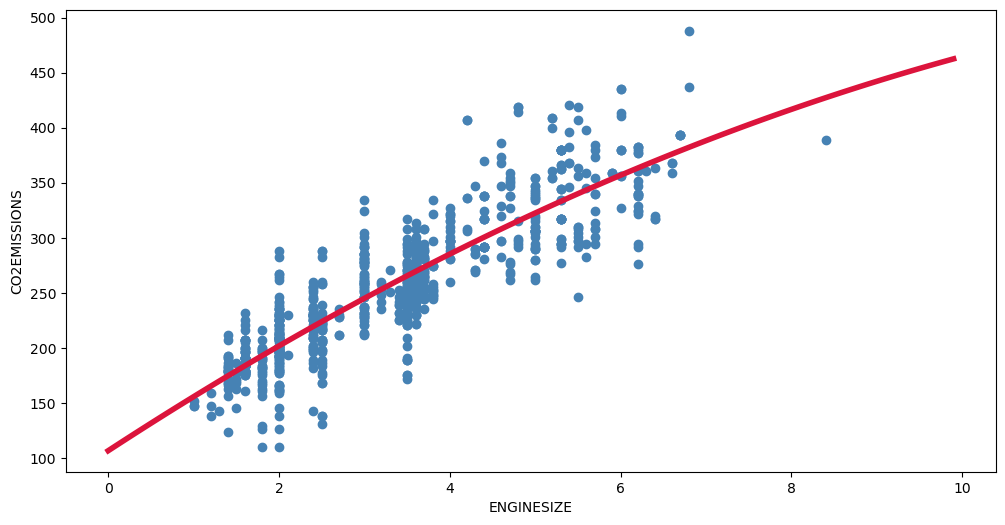

In [35]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
xx= np.arange(0.0, 10.0, 0.1)
yy= clf.intercept_[0] + clf.coef_[0][1] * xx + clf.coef_[0][2]* np.power(xx,2)
plt.plot(xx, yy, "crimson", linewidth = 4)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

### Evaluation

- mae
- mse
- r-2

#### Mean Absolute Error


In [38]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [44]:
test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print(f"R2 Score : {r2_score(test_y, test_y_)}")
print(f"MEan Absolute Error (MAE) : {np.mean(np.absolute(test_y_ - test_y )):.2f}")
print(f"Mean Square Error (MSE) : {np.mean((test_y_ - test_y) ** 2): .2f}")

R2 Score : 0.7729073986514952
MEan Absolute Error (MAE) : 24.49
Mean Square Error (MSE) :  961.44
